In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [8]:
ds = pd.read_csv('./train.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
column_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin'
]

df = ds.drop(column_drop, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
def convert_sex_to_num(s):
    if s == 'male':
        return 0
    elif s == 'female':
        return 1
    else:
        return s

def convert_embarked_to_num(e):
    if e == 'C':
        return 0
    elif e == 'Q':
        return 1
    elif e == 'S':
        return 2
    else:
        return e

df.Sex = df.Sex.map(convert_sex_to_num)
df.Embarked = df.Embarked.map(convert_embarked_to_num)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


In [17]:
df.Age = df.Age.fillna(df.Age.mean())

data = df.dropna()
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [18]:
data = data.reset_index(drop=True)

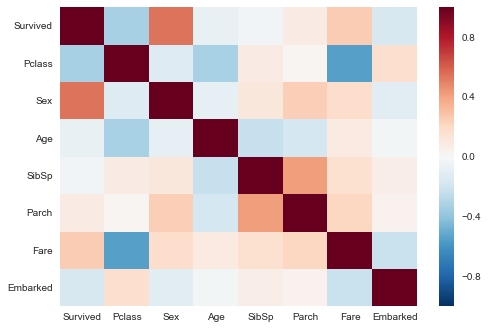

In [19]:
plt.figure(0)
sns.heatmap(data.corr())

In [20]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
output_cols = ['Survived']
x = data[input_cols]
y = data[output_cols]

print(x.shape, y.shape)

(889, 7) (889, 1)


In [21]:
data = data.reset_index(drop=True)

In [22]:
DT = DecisionTreeClassifier()
DT.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [60]:
DT.score(x, y)

0.98200224971878514

In [61]:
rf = RandomForestClassifier(n_estimators=10000)
rf.fit(x, y)

rf.score(x, y)

c:\python34\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.98200224971878514

In [49]:
LR = LogisticRegression()
LR.fit(x, y)
LR.score(x[:50], y[:50])

c:\python34\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.76000000000000001

In [30]:
test = pd.read_csv('./test.csv')

In [31]:
test=test.drop(column_drop, axis=1)

In [32]:
test.shape

(418, 7)

In [33]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [41]:
example = pd.read_csv('./gender_submission.csv')

In [42]:
example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
test.Sex = test.Sex.map(convert_sex_to_num)
test.Embarked = test.Embarked.map(convert_embarked_to_num)


In [36]:
test=test.fillna(test.mean())

In [62]:
result = rf.predict(test)

In [63]:
result.shape

(418,)

In [64]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [65]:
answer = pd.read_csv('./test.csv')

In [66]:
answer = answer.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

In [67]:
answer['Survived'] = result

In [68]:
answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [69]:
answer = answer.to_csv('titanic_result.csv', index=False, encoding='utf-8')